# Chapter 8

## Question 7

In which we apply random forest regression to the `Boston` dataset to predict `medv`, the median house price, varying the number of predictors, and the number of trees.

In [1]:
import statsmodels.api as sm
import sklearn.ensemble
import sklearn.model_selection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm import tqdm_notebook
from collections import namedtuple

sns.set(style="whitegrid")

In [2]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop(columns="medv")
y = boston.medv

In [4]:
DataPoint = namedtuple('DataPoint', 'num_features, num_trees, scores')

In [5]:
data = []
for num_features in tqdm_notebook(range(1, len(X.columns)+1)):
    for num_trees in[1,10,50,100,500]:
        random_forest = sklearn.ensemble.RandomForestRegressor(n_estimators=num_trees, max_features=num_features)
        scores = sklearn.model_selection.cross_val_score(random_forest, X, y, cv=5, scoring="neg_mean_squared_error")
        score = np.mean(scores)
        data.append(DataPoint(num_features, num_trees, scores))

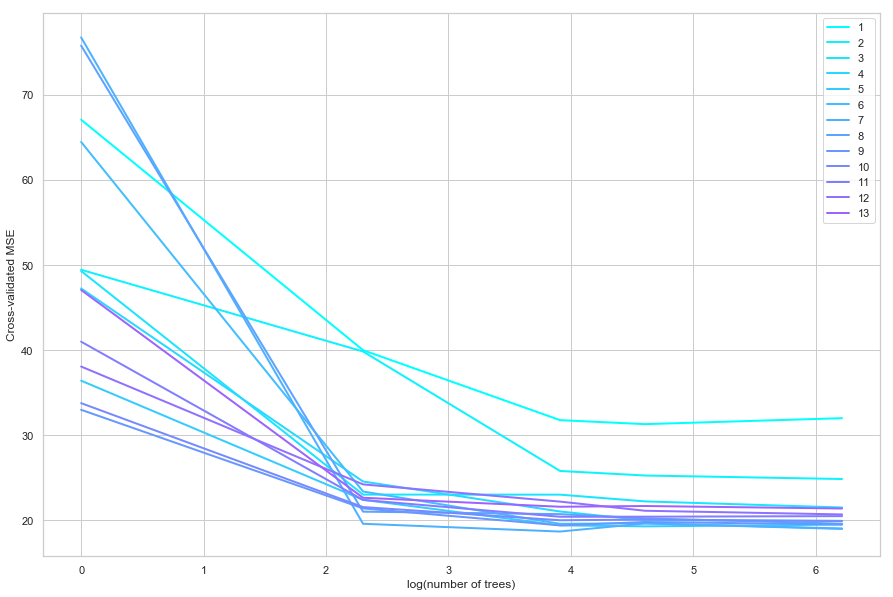

In [6]:
fig, ax = plt.subplots(figsize=(15,10))

cmap = plt.cm.cool  
cmaplist = [cmap(i*13/cmap.N) for i in range(cmap.N)]


for i,num_features in enumerate(set(point.num_features for point in data)):
    log_num_trees = [np.log(point.num_trees) for point in data if point.num_features == num_features]
    scores = [-np.mean(point.scores) for point in data if point.num_features == num_features]
    
    ax.plot(log_num_trees,scores, label=str(num_features), lw=2, c=cmaplist[i]) #, c=purple_16.mpl_colors[i])
ax.set_xlabel("log(number of trees)")
ax.set_ylabel("Cross-validated MSE")
plt.legend()
plt.show()
